In [1]:
import os
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import shutil

## MSE for xas annotation (Generated plot-raw data)

In [5]:
def mse_func(y_true:np.ndarray, y_pred:np.ndarray) -> float:
    return np.mean((y_true - y_pred)**2)

def mae_func(y_true:np.ndarray, y_pred:np.ndarray) -> float:
    return np.mean(np.abs(y_true - y_pred))

def ann_error(raw_data, ann_data, error_func: callable):
    '''
    ## Calculate the error between raw data and ann data

    ### Args:
        - raw_data: tuple/list of (x_raw, y_raw)
        - ann_data: tuple/list of (x_ann, y_ann)
        - error_func: callable function to calculate the error between y_raw and y_ann
    
    ### Returns:
        - error: float
    '''
    x_raw,y_raw = raw_data
    x_ann,y_ann = ann_data
    y_raw_interpolated = np.interp(x_raw, x_ann, y_ann)
    return error_func(y_raw, y_raw_interpolated)

def load_pkl(file_path:str):
    with open(file_path,'rb') as f:
        data=pkl.load(f)
    return data

def save_pkl(file_path:str,data:object):
    with open(file_path,'wb') as f:
        pkl.dump(data,f)

def cal_error(raw_path,ann_path):
    error_list=[]
    for _file in os.listdir(raw_path):
        if _file.endswith('.DS_Store'):
            continue
        raw_data=load_pkl(os.path.join(raw_path,_file))
        if 'EXAFS' in raw_path and int(_file.split('_')[1].split('.')[0]) >=25:
            continue
        for i in range(len(raw_data)):
                ann_data=pd.read_csv(os.path.join(ann_path,_file.replace('.pkl',''),f'data_{i}'+'.csv'),header=None).to_numpy().T
                error=ann_error(raw_data[i],ann_data,mse_func)
                error_list.append(error)
        # except:
        #     if int(_file.split('_')[1].split('.')[0]) >=25 and 'EXAFS' in raw_path:
        #         pass
        #     else:
        #         print(f'{os.path.join(raw_path,_file)} skipped')
    return error_list
xanes_err_expert2=cal_error('../Validation/raw_data/XANES','../Validation/ICC/plots_expert2/XANES')
exafs_err_expert2=cal_error('../Validation/raw_data/EXAFS','../Validation/ICC/plots_expert2/EXAFS')
xanes_err_expert4=cal_error('../Validation/raw_data/XANES','../Validation/ICC/plots_expert4/XANES')
exafs_err_expert4=cal_error('../Validation/raw_data/EXAFS','../Validation/ICC/plots_expert4/EXAFS')
xanes_err_expert1=cal_error('../Validation/raw_data/XANES','../Validation/ICC/plots_expert1/XANES')
exafs_err_expert1=cal_error('../Validation/raw_data/EXAFS','../Validation/ICC/plots_expert1/EXAFS')
xanes_err_expert3=cal_error('../Validation/raw_data/XANES','../Validation/ICC/plots_expert3/XANES')
exafs_err_expert3=cal_error('../Validation/raw_data/EXAFS','../Validation/ICC/plots_expert3/EXAFS')
print(len(xanes_err_expert2),len(exafs_err_expert2),len(xanes_err_expert1),len(exafs_err_expert1),len(xanes_err_expert4),len(exafs_err_expert4),len(xanes_err_expert3),len(exafs_err_expert3))
np.mean(xanes_err_expert2),np.mean(exafs_err_expert2),np.mean(xanes_err_expert4),np.mean(exafs_err_expert4),np.mean(xanes_err_expert1),np.mean(exafs_err_expert1),np.mean(xanes_err_expert3),np.mean(exafs_err_expert3)

115 60 115 60 115 60 115 60


(0.016071295875720013,
 0.09457917498811756,
 0.0014481762693696724,
 0.09281932065286853,
 0.0006658296935051086,
 0.10158318086651907,
 0.05214700824466089,
 0.09437127958763322)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py

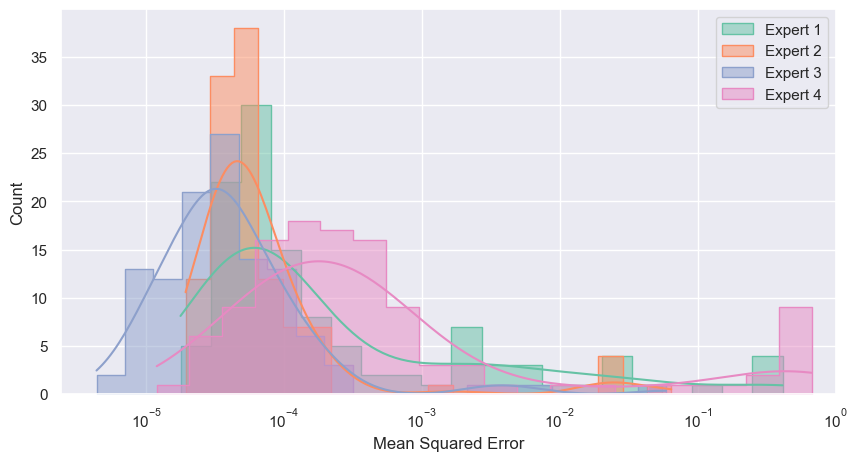

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py

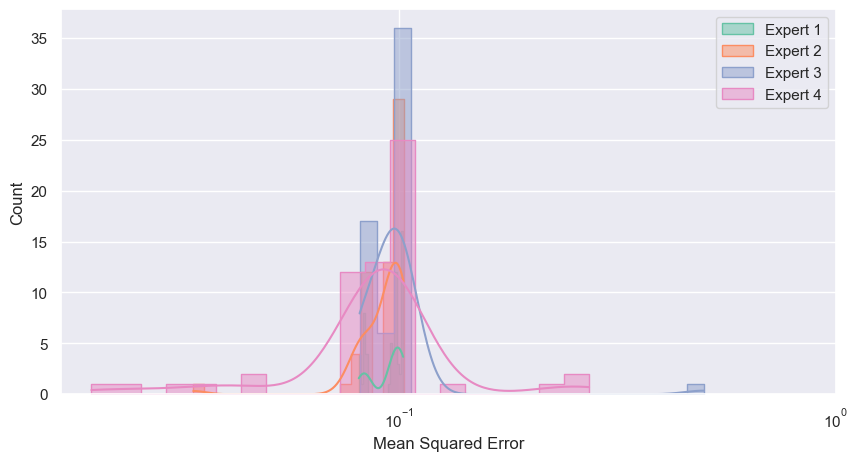

In [6]:
bins=20

sns.set_theme(palette='Set2')
# sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(10,5))
sns.histplot(xanes_err_expert2,kde=True,label='Expert 1',alpha=0.5,bins=bins,stat='count',common_norm=False,element='step',log_scale=True)
sns.histplot(xanes_err_expert4,kde=True,label='Expert 2',alpha=0.5,bins=bins,stat='count',common_norm=False,element='step',log_scale=True)
sns.histplot(xanes_err_expert1,kde=True,label='Expert 3',alpha=0.5,bins=bins,stat='count',common_norm=False,element='step',log_scale=True)
sns.histplot(xanes_err_expert3,kde=True,label='Expert 4',alpha=0.5,bins=bins,stat='count',common_norm=False,element='step',log_scale=True)
plt.legend()
plt.ylabel('Count')
plt.xlabel('Mean Squared Error')
plt.xlim(0,1)
plt.savefig('./mse_hist_xanes.png',dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

sns.set_theme(palette='Set2')
# sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(10,5))
sns.histplot(exafs_err_expert2,kde=True,label='Expert 1',alpha=0.5,bins=bins,stat='count',common_norm=False,element='step',log_scale=True)
sns.histplot(exafs_err_expert4,kde=True,label='Expert 2',alpha=0.5,bins=bins,stat='count',common_norm=False,element='step',log_scale=True)
sns.histplot(exafs_err_expert1,kde=True,label='Expert 3',alpha=0.5,bins=bins,stat='count',common_norm=False,element='step',log_scale=True)
sns.histplot(exafs_err_expert3,kde=True,label='Expert 4',alpha=0.5,bins=bins,stat='count',common_norm=False,element='step',log_scale=True)
plt.legend()
plt.ylabel('Count')
plt.xlabel('Mean Squared Error')
plt.xlim(0,1)
plt.savefig('./mse_hist_exafs.png',dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

## Intraclass Correlation Coefficient (ICC) for Sequences
To condict the inter-expert agreement measurement, we need to introduce the ICC, which measures the reliability of measurements or ratings for clusters of data.

Since ICC is typically used for single values, we need to adapt it for sequences. One way to do this is to calculate ICC for each point in the sequences and then aggregate the results.

Steps to Calculate ICC for Sequences
- Align the Data: Ensure all sequences are of the same length. If not, use interpolation to align them.
- Calculate ICC for Each Point: Compute ICC for each position in the sequences across experts.
- Aggregate ICC Values: Average the ICC values across all positions.

Example:

| Type | Description             | ICC      | F       | df1 | df2 | pval         | CI95%       |
| :---: | ----------------------- | -------- | ------- | --- | --- | ------------ | ----------- |
| ICC1 | Single raters absolute  | 0.997357 | 1510.20 | 4   | 15  | 2.414720e-19 | [0.99, 1.0] |
| ICC2 | Single random raters    | 0.997357 | 1887.75 | 4   | 12  | 1.115398e-16 | [0.99, 1.0] |
| ICC3 | Single fixed raters     | 0.997884 | 1887.75 | 4   | 12  | 1.115398e-16 | [0.99, 1.0] |
| ICC1k | Average raters absolute | 0.999338 | 1510.20 | 4   | 15  | 2.414720e-19 | [1.0, 1.0]  |
| ICC2k | Average random raters   | 0.999338 | 1887.75 | 4   | 12  | 1.115398e-16 | [1.0, 1.0]  |
| ICC3k | Average fixed raters    | 0.999470 | 1887.75 | 4   | 12  | 1.115398e-16 | [1.0, 1.0]  |


Explanation of ICC Table:
- ICC1 (Single raters absolute): Measures the reliability of a single rater's rating. It assumes that different raters rate different targets.
- ICC2 (Single random raters): Measures the reliability of a single rating, assuming raters are randomly selected from a larger population.
- ICC3 (Single fixed raters): Measures the reliability of a single rating, assuming that the raters are the only raters of interest.
- ICC1k (Average raters absolute): Measures the reliability of the mean of k raters' ratings, with different raters rating different targets.
- ICC2k (Average random raters): Measures the reliability of the mean of k raters' ratings, assuming raters are randomly selected from a larger population.
- ICC3k (Average fixed raters): Measures the reliability of the mean of k raters' ratings, assuming that the raters are the only raters of interest.

How to Choose the Appropriate ICC? To select the appropriate ICC value, consider the following:

1. Nature of Raters: Are the raters randomly selected or fixed?

- If raters are fixed (i.e., these specific raters are of interest), use ICC3 or ICC3k.
- If raters are considered a random sample from a larger population, use ICC2 or ICC2k.
2. Single Rating vs. Average of Ratings:

- If you are interested in the reliability of a single rating, use ICC1, ICC2, or ICC3.
- If you are interested in the reliability of the average of multiple ratings, use ICC1k, ICC2k, or ICC3k.

Here because we have fixed experts and interested in the reliability of the average of multiple ratings, we choose ICC3k as our main metric:
- ICC Value: 0.999470 indicates almost perfect agreement among the raters.
- F Value: 1887.75, indicating a high level of variance explained by the raters.
- Degrees of Freedom (df1 and df2): These are the degrees of freedom for the F-test.
- p-value: 1.115398e-16, indicating the result is statistically significant.
- Confidence Interval (CI95%): [1.0, 1.0], showing very tight bounds, indicating high precision.

The final ICC value (ICC3k - Average fixed raters) is 0.999470 with a 95% confidence interval of [1.0, 1.0], indicating almost perfect agreement among the raters. This high ICC value suggests that the annotations are highly consistent across the experts.

In [7]:
def ANN_ICC(x_value,y_values):
    '''
    ## Calculate the ICC of the Inter-Expert annotated xas spectrum data

    ### Args:
        - x_value: list of xas energy values
        - y_values: list of y values of each expert

    ### Example:
    ```python
    >>> x_value=[0, 1.0, 2.0, 3.0, 4.0]
    >>> y_values=[[0.1, 0.9, 1.8, 3.1, 4.0],
                  [0.2, 1.0, 1.9, 3.0, 4.1],
                  [0.0, 0.8, 1.7, 3.2, 3.9],
                  [0.1, 0.9, 1.8, 3.1, 4.0]]
    >>> ANN_ICC(x_value,y_values)
    ```
    '''
    data={'Energy':x_value}
    data.update({f'Expert {i+1}':y_values[i] for i in range(len(y_values))})
    df=pd.DataFrame(data)
    long_chart=df.melt(id_vars='Energy',value_vars=[f'Expert {i+1}' for i in range(len(y_values))],var_name='Expert',value_name='ABS_val',ignore_index=True)
    icc=pg.intraclass_corr(data=long_chart, targets='Energy', raters='Expert', ratings='ABS_val')
    return icc
x_value=[0, 1.0, 2.0, 3.0, 4.0]
y_values=[[0.1, 0.9, 1.8, 3.1, 4.0],
          [0.2, 1.0, 1.9, 3.0, 4.1],
          [0.0, 0.8, 1.7, 3.2, 3.9],
          [0.1, 0.9, 1.8, 3.1, 4.0]]
text=ANN_ICC(x_value,y_values).values[:,:2]
ANN_ICC(x_value,y_values)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.997357,1510.20,4,15,2.414720e-19,"[0.99, 1.0]"
1,ICC2,Single random raters,0.997357,1887.75,4,12,1.115398e-16,"[0.99, 1.0]"
2,ICC3,Single fixed raters,0.997884,1887.75,4,12,1.115398e-16,"[0.99, 1.0]"
3,ICC1k,Average raters absolute,0.999338,1510.20,4,15,2.414720e-19,"[1.0, 1.0]"
4,ICC2k,Average random raters,0.999338,1887.75,4,12,1.115398e-16,"[1.0, 1.0]"
5,ICC3k,Average fixed raters,0.999470,1887.75,4,12,1.115398e-16,"[1.0, 1.0]"


In [8]:
expert1=f'../Validation/ICC/plots_expert1/XAS'
expert2=f'../Validation/ICC/plots_expert2/XAS'
expert3=f'../Validation/ICC/plots_expert3/XAS'
expert4=f'../Validation/ICC/plots_expert4/XAS   '
raw_path=f'../Validation/raw_data/XAS'
def interpolate(raw_data,ann_data):
    x_raw,_ = raw_data
    x_ann,y_ann = ann_data
    y_raw_interpolated = np.interp(x_raw, x_ann, y_ann)
    return y_raw_interpolated
ICC_values=[]
for _raw in os.listdir(raw_path):
    if _raw == '.DS_Store':
        continue
    raw_data=load_pkl(os.path.join(raw_path,_raw))
    for i in range(len(raw_data)):
        expert1_data=pd.read_csv(os.path.join(expert1,_raw.replace('.pkl',''),f'data_{i}'+'.csv'),header=None).to_numpy().T
        expert2_data=pd.read_csv(os.path.join(expert2,_raw.replace('.pkl',''),f'data_{i}'+'.csv'),header=None).to_numpy().T
        expert3_data=pd.read_csv(os.path.join(expert3,_raw.replace('.pkl',''),f'data_{i}'+'.csv'),header=None).to_numpy().T
        expert4_data=pd.read_csv(os.path.join(expert4,_raw.replace('.pkl',''),f'data_{i}'+'.csv'),header=None).to_numpy().T
        expert1_interpolated=interpolate(raw_data[i],expert1_data)
        expert2_interpolated=interpolate(raw_data[i],expert2_data)
        expert3_interpolated=interpolate(raw_data[i],expert3_data)
        expert4_interpolated=interpolate(raw_data[i],expert4_data)
        data={'Energy':raw_data[i][0],'Expert 1':expert1_interpolated,'Expert 2':expert2_interpolated,'Expert 3':expert3_interpolated,'Expert 4':expert4_interpolated}
        df=pd.DataFrame(data)
        long_chart=df.melt(id_vars='Energy',value_vars=['Expert 1','Expert 2','Expert 3','Expert 4'],var_name='Expert',value_name='ABS_val',ignore_index=True)
        icc=pg.intraclass_corr(data=long_chart, targets='Energy', raters='Expert', ratings='ABS_val')
        ICC_values.append(icc.values[:,2:])
ICC_values=np.array(ICC_values)
np.save(f'./ICC_values.npy',ICC_values)

In [9]:
pd.DataFrame(np.concatenate((text,np.mean(ICC_values,axis=0)),axis=1),columns=['Type','Description','ICC','F','df1','df2','pval','CI95%'])

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.913827,15414.610183,99.0,300.0,0.000001,"[0.897826086956522, 0.9306086956521737]"
1,ICC2,Single random raters,0.919481,21277.576898,99.0,297.0,0.0,"[0.8760000000000001, 0.9474782608695652]"
2,ICC3,Single fixed raters,0.94636,21277.576898,99.0,297.0,0.0,"[0.9333913043478265, 0.9586086956521738]"
3,ICC1k,Average raters absolute,0.961282,15414.610183,99.0,300.0,0.000001,"[0.9478260869565214, 0.9722608695652172]"
4,ICC2k,Average random raters,0.966116,21277.576898,99.0,297.0,0.0,"[0.9270434782608695, 0.9815652173913041]"
5,ICC3k,Average fixed raters,0.98084,21277.576898,99.0,297.0,0.0,"[0.9743478260869562, 0.9863478260869563]"
